<a href="https://colab.research.google.com/github/Shobhit043/pytorch_tutorial/blob/main/Simple_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics  import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Dataset

In [124]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
df = pd.read_csv(url)

In [125]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [126]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [127]:
df['species'] = df['species'].map({
    'setosa':0,
    'versicolor':1,
    'virginica':2
})

In [128]:
X = torch.FloatTensor(df.drop('species',axis = 1).values)
y = torch.LongTensor(df['species'].values)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 43, test_size = 0.2)

# Model Class

In [130]:
#  Create a Model clas (it inherits from nn.Module)
class Model(nn.Module):
  def __init__(self, input_features, hidden_layer1, hidden_layer2, output_features):

    # calling init function of the inherited class i.e nn.Module
    super().__init__()

    # defining model architecture
    self.fc1 = nn.Linear(input_features, hidden_layer1)
    self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)
    self.out = nn.Linear(hidden_layer2, output_features)

  def forward(self, x):

    # defining model forward pass (x is input which is later used to store other outputs as well)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.softmax(self.out(x),dim = -1)

    return x

In [131]:
torch.manual_seed(43) # mannually setting seed for random initialization of weights
model = Model(input_features = 4, hidden_layer1 = 10, hidden_layer2 = 10, output_features = 3)

In [132]:
loss_func = nn.CrossEntropyLoss() # function to calculate loss of model prediction
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01) # optimizer with learning rate = 0.01

# Training the model

In [133]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train) # forward pass which returns model perdiction

  loss = loss_func(y_pred, y_train) # calculating loss with the current predictions
  losses.append(loss.detach().item())

  optimizer.zero_grad() # Clears the old gradient values, ensuring gradients from the previous iterations don’t accumulate.
  loss.backward() # Performs backpropagation to calculate the new gradients of the loss with respect to each parameter (weights).
  optimizer.step() # Uses the calculated gradients to update the model's parameters, moving them toward values that minimize the loss.

  if i%10 == 0:
    print(loss.detach().item())


1.088339924812317
1.0474971532821655
0.968752920627594
0.8620261549949646
0.7357918620109558
0.6363637447357178
0.5952004194259644
0.5829047560691833
0.578404426574707
0.5761038661003113


Text(0.5, 0, 'epochs')

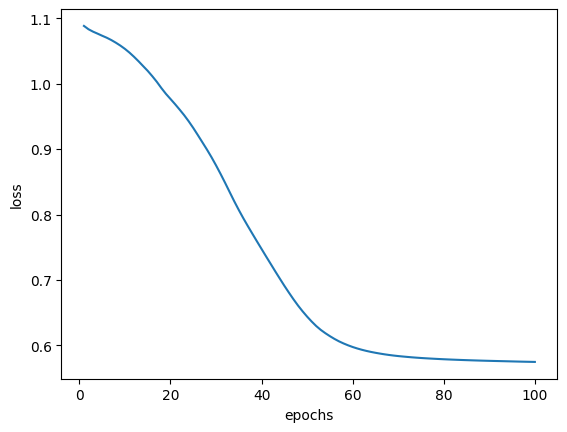

In [134]:
plt.plot(range(1,101,1),losses)
plt.ylabel('loss')
plt.xlabel('epochs')

# Evaluate

In [135]:
with torch.no_grad():
    y_pred = model(X_test)  # Get predictions
    y_pred = y_pred.cpu()  # Ensure predictions are on CPU
    y_pred_vals = [np.argmax(val).item() for val in y_pred.numpy()]

    # Ensure y_test is also on CPU and in a compatible format
    # is a conditional statement that ensures the variable y_test is converted to a NumPy array if it is a PyTorch tensor. Here's a breakdown of what it does:
    y_test = y_test.cpu().numpy() if isinstance(y_test, torch.Tensor) else y_test

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_vals)
    print(accuracy)

1.0


# Prediction

In [136]:
def make_perdictions(input):
  with torch.no_grad():
    new_flower = torch.Tensor(input)
    pred = np.argmax(model(new_flower).detach().numpy())
    if pred == 0:print('setosa')
    elif pred == 1:print('versicolor')
    else : print('virginica')

In [137]:
new_flower = torch.Tensor([4.6, 3.1, 1.5, 0.2])
make_perdictions(new_flower)

setosa


In [138]:
new_flower = torch.Tensor([6.0,	3.6,	5.0,	2.4])
make_perdictions(new_flower)

virginica


# Saving Model

In [139]:
torch.save(model.state_dict(),'my_model.pt')

# Load Model

In [143]:
new_model = Model(input_features = 4, hidden_layer1 = 10, hidden_layer2 = 10, output_features = 3)
new_model.load_state_dict(torch.load('my_model.pt', weights_only=False))

<All keys matched successfully>

In [144]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=3, bias=True)
)